<a href="https://colab.research.google.com/github/ajeuphoria/MSc-Dissertation-Project/blob/main/MSc_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://raw.githubusercontent.com/ajeuphoria/MSc-Dissertation-Project/main/raw-data-kaggle.csv'
df = pd.read_csv(url)

In [ ]:
#Reading the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42116 entries, 0 to 42115
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   athlete                   42116 non-null  int64  
 1   gender                    42116 non-null  object 
 2   timestamp                 42116 non-null  object 
 3   distance (m)              42116 non-null  float64
 4   elapsed time (s)          42116 non-null  int64  
 5   elevation gain (m)        42116 non-null  float64
 6   average heart rate (bpm)  23732 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
#Using Data Imputation and filling in HR data and grouping by runners

grouped_data = df.groupby("athlete")
imputed_data = grouped_data["average heart rate (bpm)"].transform("mean")
df["average heart rate (bpm)"] = df["average heart rate (bpm)"].fillna(imputed_data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42116 entries, 0 to 42115
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   athlete                   42116 non-null  int64  
 1   gender                    42116 non-null  object 
 2   timestamp                 42116 non-null  object 
 3   distance (m)              42116 non-null  float64
 4   elapsed time (s)          42116 non-null  int64  
 5   elevation gain (m)        42116 non-null  float64
 6   average heart rate (bpm)  40530 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
# Identifying rows which are missing Heart rate

missing_rows = df[df.isna().any(axis=1)]
print(missing_rows)

        athlete gender         timestamp  distance (m)  elapsed time (s)  \
2413   20181492      F  05/01/2020 09:07       10008.0              3486   
2414   20181492      F  04/01/2020 08:07       15162.9              4761   
2415   20181492      F  02/01/2020 10:50       11583.4              3710   
2416   20181492      F  31/12/2019 10:52       12008.9              3790   
2417   20181492      F  30/12/2019 07:49        5397.8              1718   
...         ...    ...               ...           ...               ...   
40265  20181492      F  25/03/2017 16:30        4579.8              1949   
40266  20181492      F  21/03/2017 05:24        5305.4              1770   
40267  20181492      F  18/03/2017 12:30       15093.7              5888   
40268  20181492      F  17/03/2017 05:25        6981.5              2295   
40269  20181492      F  15/03/2017 04:58       10968.0              3548   

       elevation gain (m)  average heart rate (bpm)  
2413                 42.0        

In [ ]:
# Filling rows with missing heart rates by substituting with overall mean

overall_mean = df['average heart rate (bpm)'].mean()

# Identify runners without heart rate data

df['average heart rate (bpm)'].fillna(overall_mean, inplace=True)

print(overall_mean)

147.61074077807584


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42116 entries, 0 to 42115
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   athlete                   42116 non-null  int64  
 1   gender                    42116 non-null  object 
 2   timestamp                 42116 non-null  object 
 3   distance (m)              42116 non-null  float64
 4   elapsed time (s)          42116 non-null  int64  
 5   elevation gain (m)        42116 non-null  float64
 6   average heart rate (bpm)  42116 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
df.head()

,athlete,gender,timestamp,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm)
0,18042525,M,15/12/2019 09:08,2965.8,812,17.4,150.3
1,18042525,M,10/12/2019 19:27,10020.8,3290,52.2,160.8
2,18042525,M,03/12/2019 19:46,12132.2,4027,249.0,148.9
3,18042525,M,26/11/2019 19:46,11631.5,4442,194.0,136.2
4,18042525,M,19/11/2019 19:45,11708.1,4022,250.7,146.0


In [ ]:
# Drop duplicates based on 'runner_id' and 'timestamp' columns

df = df.drop_duplicates(subset=['athlete', 'timestamp'])

# The resulting DataFrame (df) will have duplicates removed based on both columns


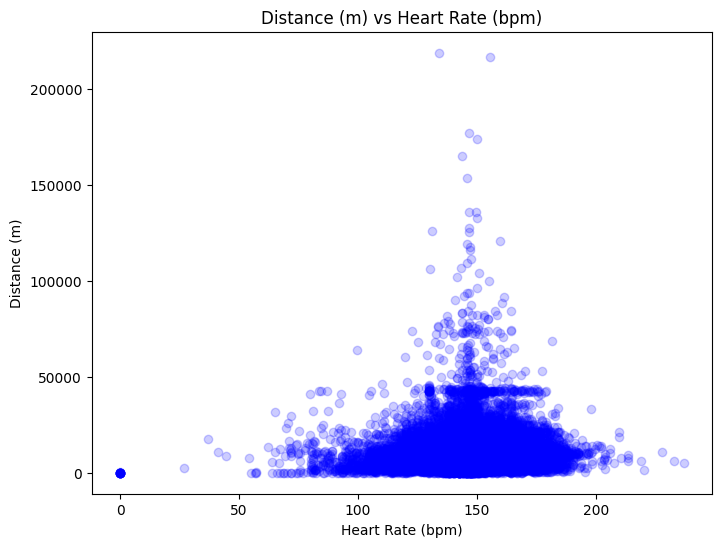

In [ ]:
# Visuals

# Creating a scatter plot

plt.figure(figsize=(8, 6))
plt.scatter(df['average heart rate (bpm)'], df['distance (m)'], color = 'blue', alpha = 0.2)
plt.title('Distance (m) vs Heart Rate (bpm)')

plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Distance (m)')
plt.show()

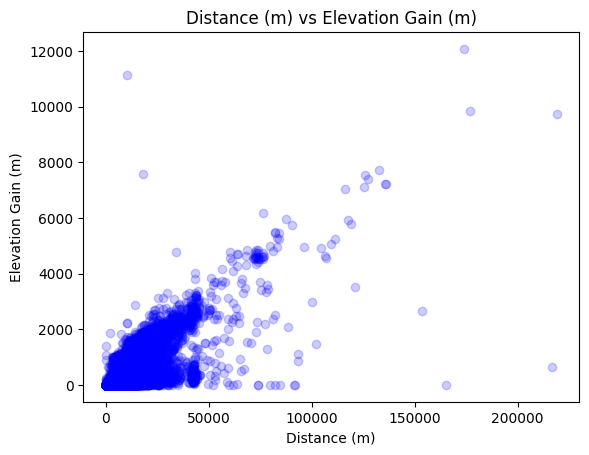

In [ ]:
# Scatter plot for distance vs Elevation gain

plt.scatter(df['distance (m)'], df['elevation gain (m)'], color='blue', alpha=0.2)
plt.title('Distance (m) vs Elevation Gain (m)')
plt.xlabel('Distance (m)')
plt.ylabel('Elevation Gain (m)')
plt.show()

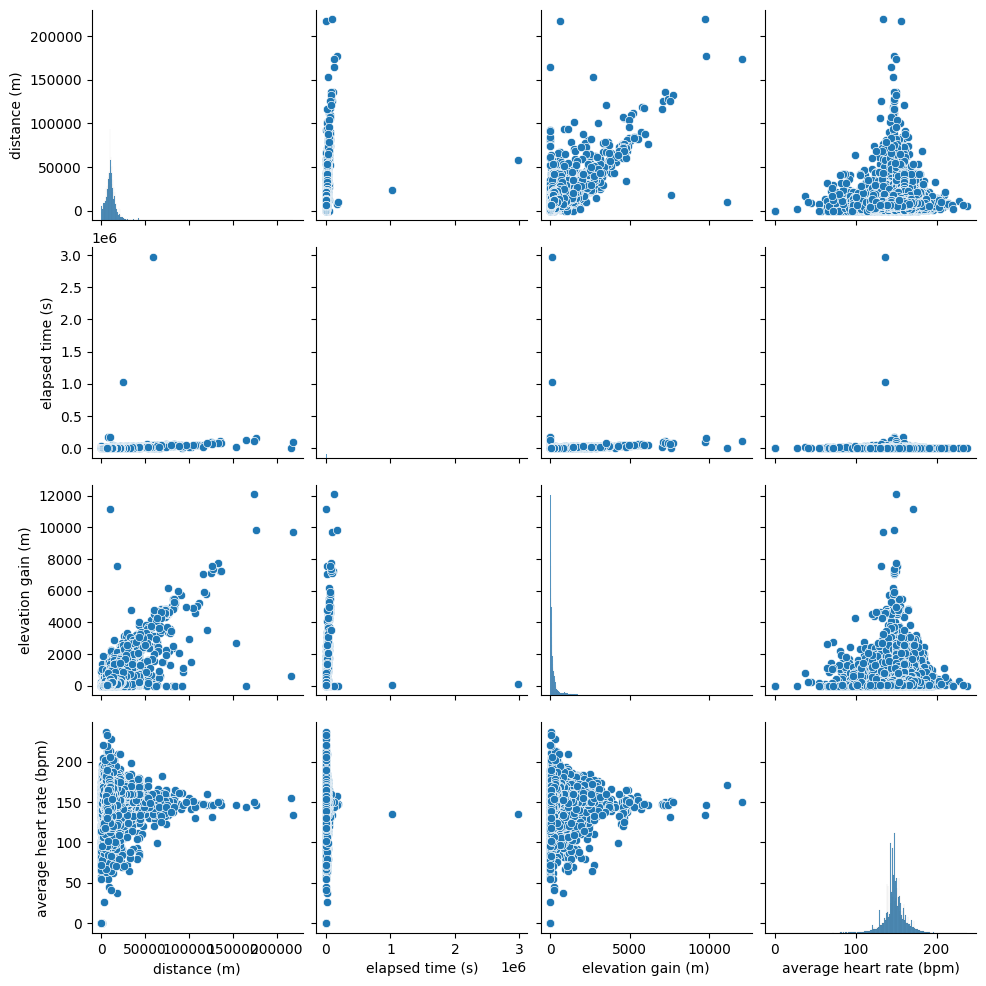

In [ ]:
# Drop 'athlete' column before creating pairplot
df_without_id = df.drop(columns = ['athlete'])


# Creating a pairplot without 'athlete ID'
sns.pairplot(df_without_id)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41644 entries, 0 to 42115
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   athlete                   41644 non-null  int64  
 1   gender                    41644 non-null  object 
 2   timestamp                 41644 non-null  object 
 3   distance (m)              41644 non-null  float64
 4   elapsed time (s)          41644 non-null  int64  
 5   elevation gain (m)        41644 non-null  float64
 6   average heart rate (bpm)  41644 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.5+ MB


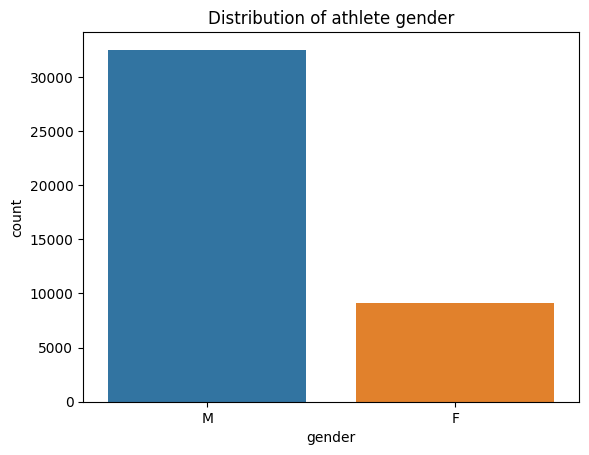

In [ ]:
# Distribution of athlete gender

sns.countplot(data = df, x = 'gender')
plt.title('Distribution of athlete gender')
plt.show()

<Axes: >

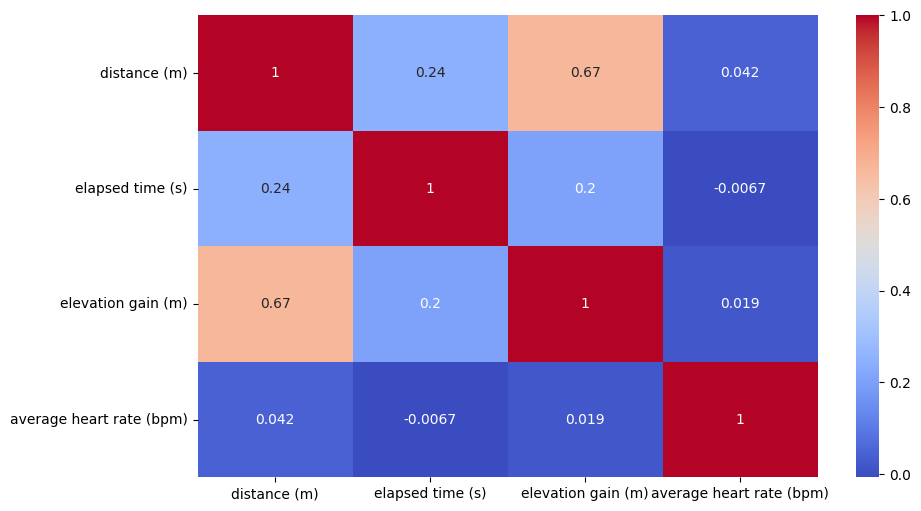

In [ ]:
# Corelation Heatmap

for_corr= df.drop(columns = 'athlete')
plt.figure(figsize=(10,6))
corr_matrix = for_corr.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

In [ ]:
corr_matrix["elapsed time (s)"].sort_values(ascending = False)

elapsed time (s)            1.000000
distance (m)                0.243735
elevation gain (m)          0.202988
average heart rate (bpm)   -0.006719
Name: elapsed time (s), dtype: float64

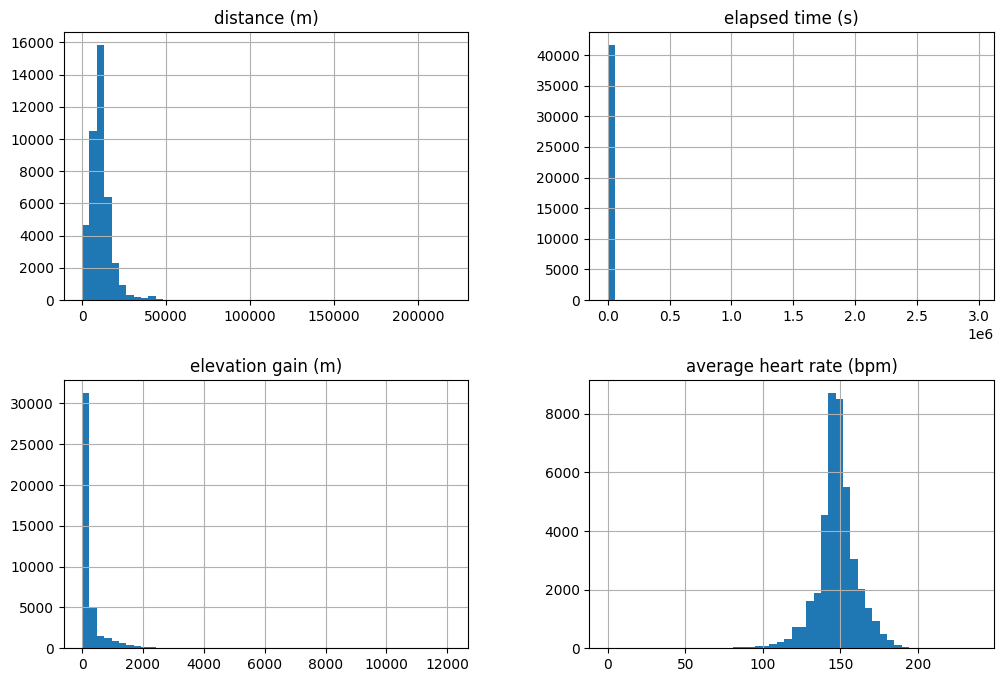

In [ ]:
for_hist = df.drop(columns = 'athlete')
for_hist.hist(bins = 50, figsize = (12,8))  # bins = 50 is grouping the total dataset into 50 groups)
plt.show()

## Grouping Athletes to understand their frequency of runs in a week and categorising them as High, Low and Medium

In [ ]:

# Convert the 'timestamp' column to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract the week number from the 'timestamp' column
df['week_number'] = df['timestamp'].dt.week

# Categorize runners into 'Advanced', 'Intermediate', and 'Beginner' based on their weekly runs
def categorize_runs(runs_per_week):
    if runs_per_week >= 5:
        return "Advanced"
    elif 3 <= runs_per_week <= 4:
        return "Intermediate"
    else:
        return "Beginner"

runner_weekly_counts = df.groupby(['athlete', 'week_number']).size().reset_index(name='runs_per_week')  #Group by Athlete and Week number


runner_weekly_counts['run_category'] = runner_weekly_counts['runs_per_week'].apply(categorize_runs) # Creating new column run category and applying the categorize_runs functions for each row.

# Count the number of runners in each category
runner_category_counts = runner_weekly_counts.groupby('run_category')['athlete'].nunique().reset_index()  # Grouping by category and taking unique athlete id.

# Display the results
print(runner_category_counts)


   run_category  athlete
0      Advanced      107
1      Beginner       89
2  Intermediate       99


In [ ]:
count_athletes = df['athlete'].nunique()
print(count_athletes)

116


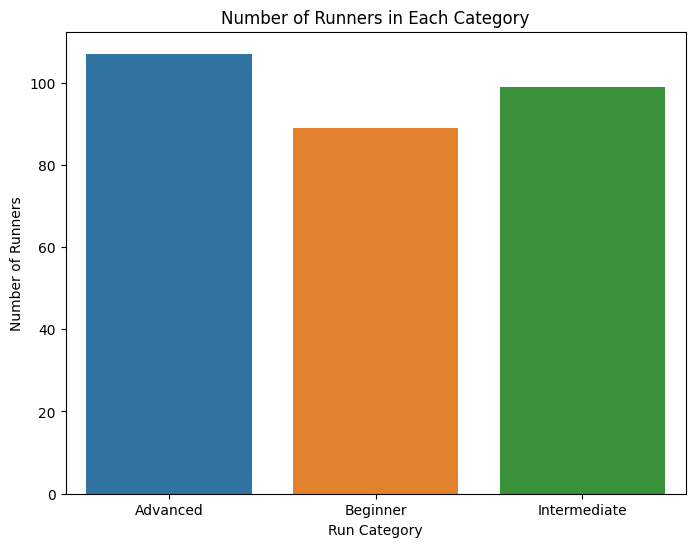

In [ ]:
# Create a bar plot

plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.barplot(x='run_category', y='athlete', data=runner_category_counts)

# Add labels and title
plt.xlabel('Run Category')
plt.ylabel('Number of Runners')
plt.title('Number of Runners in Each Category')

plt.show()

In [ ]:
runner_weekly_counts.info()
runner_weekly_counts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   athlete        5565 non-null   int64 
 1   week_number    5565 non-null   int64 
 2   runs_per_week  5565 non-null   int64 
 3   run_category   5565 non-null   object
dtypes: int64(3), object(1)
memory usage: 174.0+ KB


,athlete,week_number,runs_per_week,run_category
0,771514,1,1,Beginner
1,771514,2,1,Beginner
2,771514,4,1,Beginner
3,771514,6,1,Beginner
4,771514,7,2,Beginner


In [ ]:
df.head()

,athlete,gender,timestamp,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number
0,18042525,M,2019-12-15 09:08:00,2965.8,812,17.4,150.3,50
1,18042525,M,2019-10-12 19:27:00,10020.8,3290,52.2,160.8,41
2,18042525,M,2019-03-12 19:46:00,12132.2,4027,249.0,148.9,11
3,18042525,M,2019-11-26 19:46:00,11631.5,4442,194.0,136.2,48
4,18042525,M,2019-11-19 19:45:00,11708.1,4022,250.7,146.0,47


Applying One-Hot Encoding Technique for the Gender Column

In [ ]:
df_encoded = pd.get_dummies(df, columns = ['gender'])

In [ ]:
df_encoded.head()

,athlete,timestamp,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number,gender_F,gender_M
0,18042525,2019-12-15 09:08:00,2965.8,812,17.4,150.3,50,0,1
1,18042525,2019-10-12 19:27:00,10020.8,3290,52.2,160.8,41,0,1
2,18042525,2019-03-12 19:46:00,12132.2,4027,249.0,148.9,11,0,1
3,18042525,2019-11-26 19:46:00,11631.5,4442,194.0,136.2,48,0,1
4,18042525,2019-11-19 19:45:00,11708.1,4022,250.7,146.0,47,0,1


In [ ]:
encoded_data = df_encoded.copy()   #Keeping a copy of the label encoded data

In [ ]:
encoded_data['Year'] = df_encoded['timestamp'].dt.year
encoded_data['Month'] = df_encoded['timestamp'].dt.month
encoded_data['Day'] = df_encoded['timestamp'].dt.day

In [ ]:
encoded_data.head()

,athlete,timestamp,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number,gender_F,gender_M,Year,Month,Day
0,18042525,2019-12-15 09:08:00,2965.8,812,17.4,150.3,50,0,1,2019,12,15
1,18042525,2019-10-12 19:27:00,10020.8,3290,52.2,160.8,41,0,1,2019,10,12
2,18042525,2019-03-12 19:46:00,12132.2,4027,249.0,148.9,11,0,1,2019,3,12
3,18042525,2019-11-26 19:46:00,11631.5,4442,194.0,136.2,48,0,1,2019,11,26
4,18042525,2019-11-19 19:45:00,11708.1,4022,250.7,146.0,47,0,1,2019,11,19


In [ ]:
encoded_data.drop('timestamp', axis = 1, inplace = True)

In [ ]:
encoded_data.head()
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41644 entries, 0 to 42115
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   athlete                   41644 non-null  int64  
 1   distance (m)              41644 non-null  float64
 2   elapsed time (s)          41644 non-null  int64  
 3   elevation gain (m)        41644 non-null  float64
 4   average heart rate (bpm)  41644 non-null  float64
 5   week_number               41644 non-null  int64  
 6   gender_F                  41644 non-null  uint8  
 7   gender_M                  41644 non-null  uint8  
 8   Year                      41644 non-null  int64  
 9   Month                     41644 non-null  int64  
 10  Day                       41644 non-null  int64  
dtypes: float64(3), int64(6), uint8(2)
memory usage: 3.3 MB


**Grouping athletes before training in order to personalise for individual predictions**

In [ ]:
# List of unique athletes
athletes_r = encoded_data['athlete'].unique()

models = {}

for athlete in athletes_r:
    # Filter data for the athlete
    athlete_data_r = encoded_data[encoded_data['athlete'] == athlete]    # This creates a boolean mask. For each row in encoded_data,
    # it checks whether the value in the 'athlete' column is equal to the current athlete value from the loop.
    # The result is a series of True and False values.

Standardising the dataset for Regression Algorithms

In [ ]:
# Standardizing the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
athlete_data_r = pd.DataFrame(scaler.fit_transform(athlete_data_r), columns=athlete_data_r.columns)
athlete_data_r.head()

,athlete,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number,gender_F,gender_M,Year,Month,Day
0,0.0,0.975084,1.337419,1.024268,0.068329,-0.600459,0.0,0.0,2.582842,-0.483690,-1.638272
1,0.0,-0.788196,-0.897760,-0.702440,0.186069,-1.169159,0.0,0.0,2.582842,-1.035241,-1.638272
2,0.0,0.670941,0.858892,0.980040,0.562837,1.547961,0.0,0.0,1.060241,1.446739,1.451914
3,0.0,-0.753831,-0.806710,-0.695219,0.609933,1.547961,0.0,0.0,1.060241,1.446739,1.108560
4,0.0,-0.822560,-0.866953,-0.720492,0.000000,1.484772,0.0,0.0,1.060241,1.446739,0.536303


Splitting the dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
from math import sqrt

X = athlete_data_r.drop(columns = ['elapsed time (s)'] )
y = athlete_data_r['elapsed time (s)']


# Split the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
print('X_train shape is: ', X_train.shape)
print('y_train shape is: ', y_train.shape)
print('X_test shape is: ', X_test.shape)
print('y_test shape is: ', y_test.shape)

X_train shape is:  (152, 10)
y_train shape is:  (152,)
X_test shape is:  (39, 10)
y_test shape is:  (39,)


Applying Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_samples=0.8)
RF.fit(X_train,y_train)

RandomForestRegressor(max_samples=0.8)

In [ ]:
y_pred = RF.predict(X_test)

In [ ]:
RF_train = RF.score(X_train, y_train)
print(RF_train)

0.9844796510213638


In [ ]:
RF_test = RF.score(X_test, y_test)
print(RF_test)

0.97550827420339


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

RF_MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error : {}'.format(round(RF_MAE, 2)))

RF_MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error : {}'.format(round(RF_MSE, 2)))

RF_RMSE = sqrt(RF_MSE)
print('Root Mean Square Error  : %f' % RF_RMSE)

RF_R2_SCORE=r2_score(y_test, y_pred)
print('R2_SCORE (Coefficient Of Determination)  : %f' % RF_R2_SCORE)


Mean Absolute Error : 0.12
Mean Squared Error : 0.03
Root Mean Square Error  : 0.160298
R2_SCORE (Coefficient Of Determination)  : 0.975508


In [ ]:
from joblib import dump

dump(RF, 'RF.joblib')


['RF.joblib']

Applying Decision Tree Regression Algorithm



In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
DT_train = dt.score(X_train, y_train)
print(DT_train)

1.0


In [ ]:
DT_test = dt.score(X_test, y_test)
print(DT_test)

0.9728582184000559


In [ ]:
DT_MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error : {}'.format(round(DT_MAE, 2)))
DT_MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error : {}'.format(round(DT_MSE, 2)))
DT_RMSE = sqrt(DT_MSE)
print('Root Mean Square Error : %f' % DT_RMSE)
DT_R2_SCORE=r2_score(y_test, y_pred)
print('R2_SCORE (Coefficient Of Determination) : %f' % DT_R2_SCORE)

Mean Absolute Error : 0.13
Mean Squared Error : 0.03
Root Mean Square Error : 0.168748
R2_SCORE (Coefficient Of Determination) : 0.972858


Applying Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)



LinearRegression()

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
LR_train = LR.score(X_train, y_train)
print(LR_train)



0.9787956104568928


In [ ]:
LR_test = LR.score(X_test,y_test)
print(LR_test)

0.9755609651943833


In [ ]:
LR_MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error : {}'.format(round(LR_MAE, 2)))

LR_MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error : {}'.format(round(LR_MSE, 2)))

LR_RMSE = sqrt(LR_MSE)
print('Root Mean Square Error  : %f' % LR_RMSE)

LR_R2_SCORE=r2_score(y_test, y_pred)
print('R2_SCORE (Coefficient Of Determination)  : %f' % LR_R2_SCORE)

Mean Absolute Error : 0.13
Mean Squared Error : 0.03
Root Mean Square Error  : 0.160126
R2_SCORE (Coefficient Of Determination)  : 0.975561


Applying Gradient Boost Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(random_state=42)
GBR.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred = GBR.predict(X_test)

In [ ]:
GBR_MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error : {}'.format(round(GBR_MAE, 2)))

GBR_MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error : {}'.format(round(GBR_MSE, 2)))

GBR_RMSE = sqrt(GBR_MSE)
print('Root Mean Square Error  : %f' % GBR_RMSE)

GBR_R2_SCORE=r2_score(y_test, y_pred)
print('R2_SCORE (Coefficient Of Determination)  : %f' % GBR_R2_SCORE)

Mean Absolute Error : 0.12
Mean Squared Error : 0.02
Root Mean Square Error  : 0.152630
R2_SCORE (Coefficient Of Determination)  : 0.977795


Plot a graph for the RMSE scores for the different models


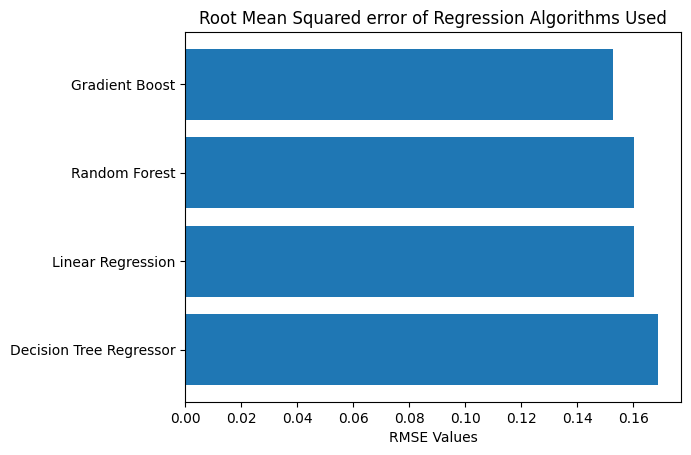

In [ ]:
algorithms = ['Decision Tree Regressor', 'Linear Regression', 'Random Forest', 'Gradient Boost']
model_scores = [DT_RMSE, LR_RMSE, RF_RMSE, GBR_RMSE ]

plt.barh(algorithms, model_scores)
plt.title('Root Mean Squared error of Regression Algorithms Used')
plt.xlabel('RMSE Values')
plt.show()

# Fatigue Detection

 Features: 'athlete', 'gender', 'timestamp', 'distance (m)', 'elapsed time (s)', 'elevation gain (m)', 'average heart rate (bpm)', 'week_number', 'gender_F', 'gender_M'

Target: 'distance (m)' (binary labels indicating fatigue)

In [ ]:
df_encoded.head()

,athlete,timestamp,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number,gender_F,gender_M
0,18042525,2019-12-15 09:08:00,2965.8,812,17.4,150.3,50,0,1
1,18042525,2019-10-12 19:27:00,10020.8,3290,52.2,160.8,41,0,1
2,18042525,2019-03-12 19:46:00,12132.2,4027,249.0,148.9,11,0,1
3,18042525,2019-11-26 19:46:00,11631.5,4442,194.0,136.2,48,0,1
4,18042525,2019-11-19 19:45:00,11708.1,4022,250.7,146.0,47,0,1


In [ ]:
df_encoded['Year'] = df_encoded['timestamp'].dt.year
df_encoded['Month'] = df_encoded['timestamp'].dt.month
df_encoded['Day'] = df_encoded['timestamp'].dt.day

In [ ]:
df_encoded.head()

,athlete,timestamp,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number,gender_F,gender_M,Year,Month,Day
0,18042525,2019-12-15 09:08:00,2965.8,812,17.4,150.3,50,0,1,2019,12,15
1,18042525,2019-10-12 19:27:00,10020.8,3290,52.2,160.8,41,0,1,2019,10,12
2,18042525,2019-03-12 19:46:00,12132.2,4027,249.0,148.9,11,0,1,2019,3,12
3,18042525,2019-11-26 19:46:00,11631.5,4442,194.0,136.2,48,0,1,2019,11,26
4,18042525,2019-11-19 19:45:00,11708.1,4022,250.7,146.0,47,0,1,2019,11,19


In [ ]:
df_encoded.drop('timestamp', axis = 1, inplace = True)

In [ ]:
df_fatigue = df_encoded.copy()

**Fatigue Score** =  Normalized Heart Rate + Normalized Elevation + Normalized Distance + Normalized Elapsed Time



In [ ]:
df_fatigue['Fatigue Score'] = abs(df_fatigue['distance (m)'] + df_fatigue['elapsed time (s)'] + df_fatigue['elevation gain (m)'] + df_fatigue['average heart rate (bpm)'])

In [ ]:
df_fatigue.head()

,athlete,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number,gender_F,gender_M,Year,Month,Day,Fatigue Score
0,18042525,2965.8,812,17.4,150.3,50,0,1,2019,12,15,3945.5
1,18042525,10020.8,3290,52.2,160.8,41,0,1,2019,10,12,13523.8
2,18042525,12132.2,4027,249.0,148.9,11,0,1,2019,3,12,16557.1
3,18042525,11631.5,4442,194.0,136.2,48,0,1,2019,11,26,16403.7
4,18042525,11708.1,4022,250.7,146.0,47,0,1,2019,11,19,16126.8


In [ ]:
df_fatigue['Fatigue Score'].describe()

count    4.164400e+04
mean     1.566780e+04
std      1.937668e+04
min      0.000000e+00
25%      1.001148e+04
50%      1.398351e+04
75%      1.826899e+04
max      3.030451e+06
Name: Fatigue Score, dtype: float64

In [ ]:
def fatigue_categorisation (score):
  if score <= 10000 :
    return("Low Fatigue")
  elif 10000 <=score <= 14000:
    return("Moderate Fatigue")
  elif 14000 < score <= 18000:
    return ("High Fatigue")
  else:
    return ("Very High Fatigue")

In [ ]:
df_fatigue['Fatigue Level'] = df_fatigue['Fatigue Score'].apply(lambda x:fatigue_categorisation (x))

In [ ]:
df_fatigue.head()

,athlete,distance (m),elapsed time (s),elevation gain (m),average heart rate (bpm),week_number,gender_F,gender_M,Year,Month,Day,Fatigue Score,Fatigue Level
0,18042525,2965.8,812,17.4,150.3,50,0,1,2019,12,15,3945.5,Low Fatigue
1,18042525,10020.8,3290,52.2,160.8,41,0,1,2019,10,12,13523.8,Moderate Fatigue
2,18042525,12132.2,4027,249.0,148.9,11,0,1,2019,3,12,16557.1,High Fatigue
3,18042525,11631.5,4442,194.0,136.2,48,0,1,2019,11,26,16403.7,High Fatigue
4,18042525,11708.1,4022,250.7,146.0,47,0,1,2019,11,19,16126.8,High Fatigue


# **Applying Classification Algorithms to train the dataset for predicting fatigue**

In [ ]:
# Get unique athlete IDs
athletes = df_fatigue['athlete'].unique()

# Dictionary to store models
models_class = {}

# Loop over each athlete
for athlete in athletes:
    # Filter data for the athlete
    athlete_data_c = df_fatigue[df_fatigue['athlete'] == athlete]

**Train and Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
X1 = athlete_data_c.drop('Fatigue Level', axis = 1)
y1 = athlete_data_c['Fatigue Level']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.2, random_state = 42)

**Applying Gaussian Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

In [ ]:
naive_bayes.fit(X1_train, y1_train)

GaussianNB()

In [ ]:
y1_pred = naive_bayes.predict(X1_test)

In [ ]:
accuracy_gnb = accuracy_score(y1_test, y1_pred)*100
print(f"Accuracy: {accuracy_gnb:.2f} %")

Accuracy: 100.00 %


In [ ]:
classification_rep = classification_report(y1_test, y1_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
                    precision    recall  f1-score   support

     High Fatigue       1.00      1.00      1.00         9
      Low Fatigue       1.00      1.00      1.00        14
 Moderate Fatigue       1.00      1.00      1.00         8
Very High Fatigue       1.00      1.00      1.00         8

         accuracy                           1.00        39
        macro avg       1.00      1.00      1.00        39
     weighted avg       1.00      1.00      1.00        39



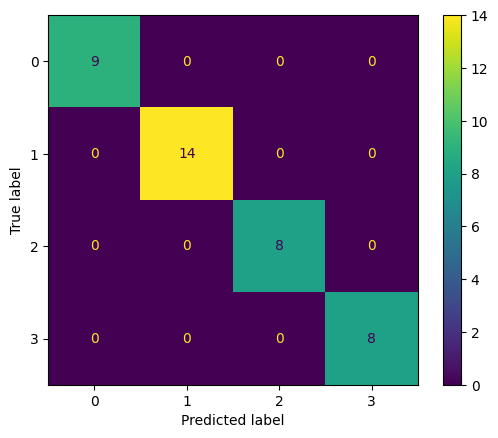

In [ ]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y1_test, y1_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

In [ ]:
from joblib import dump

dump(naive_bayes, 'naive_bayes.joblib')


['naive_bayes.joblib']

**Decision Tree Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(random_state = 42)

In [ ]:
clf.fit(X1_train, y1_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y1_pred = clf.predict(X1_test)

In [ ]:
# Evaluate the model

accuracy_dt = accuracy_score(y1_test, y1_pred)*100
conf_matrix = confusion_matrix(y1_test, y1_pred)
classification_rep = classification_report(y1_test, y1_pred)

In [ ]:
print("Accuracy:", accuracy_dt,"%")
print("Classification Report:\n", classification_rep)

Accuracy: 100.0 %
Classification Report:
                    precision    recall  f1-score   support

     High Fatigue       1.00      1.00      1.00         9
      Low Fatigue       1.00      1.00      1.00        14
 Moderate Fatigue       1.00      1.00      1.00         8
Very High Fatigue       1.00      1.00      1.00         8

         accuracy                           1.00        39
        macro avg       1.00      1.00      1.00        39
     weighted avg       1.00      1.00      1.00        39



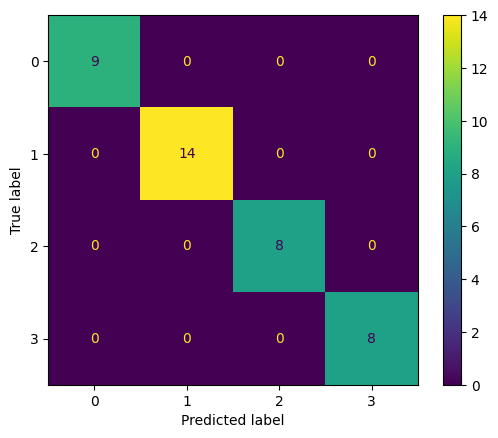

In [ ]:
# Create the confusion matrix

ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot();

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X1_train, y1_train)

RandomForestClassifier()

In [ ]:
y1_pred = rf.predict(X1_test)

In [ ]:
accuracy_rf = accuracy_score(y1_test, y1_pred )*100
print(f"Accuracy: {accuracy_rf:.2f} %")

Accuracy: 97.44 %


In [ ]:
classification_rep = classification_report(y1_test, y1_pred)
print("Classification Report:\n", classification_rep)


Classification Report:
                    precision    recall  f1-score   support

     High Fatigue       1.00      0.89      0.94         9
      Low Fatigue       1.00      1.00      1.00        14
 Moderate Fatigue       1.00      1.00      1.00         8
Very High Fatigue       0.89      1.00      0.94         8

         accuracy                           0.97        39
        macro avg       0.97      0.97      0.97        39
     weighted avg       0.98      0.97      0.97        39



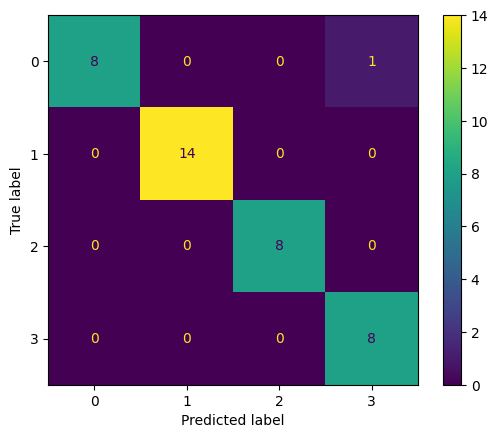

In [ ]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y1_test, y1_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot();

**Applying  k-Nearest Neighbors (k-NN) Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

In [ ]:
knn.fit(X1_train, y1_train)

KNeighborsClassifier()

In [ ]:
y1_pred = knn.predict(X1_test)

In [ ]:
accuracy_knn = accuracy_score(y1_test, y1_pred )*100
print(f"Accuracy: {accuracy_knn:.2f} %")

Accuracy: 94.87 %


In [ ]:
classification_rep = classification_report(y1_test, y1_pred)
print("Classification Report: \n", classification_rep)

Classification Report: 
                    precision    recall  f1-score   support

     High Fatigue       1.00      0.78      0.88         9
      Low Fatigue       1.00      1.00      1.00        14
 Moderate Fatigue       0.89      1.00      0.94         8
Very High Fatigue       0.89      1.00      0.94         8

         accuracy                           0.95        39
        macro avg       0.94      0.94      0.94        39
     weighted avg       0.95      0.95      0.95        39



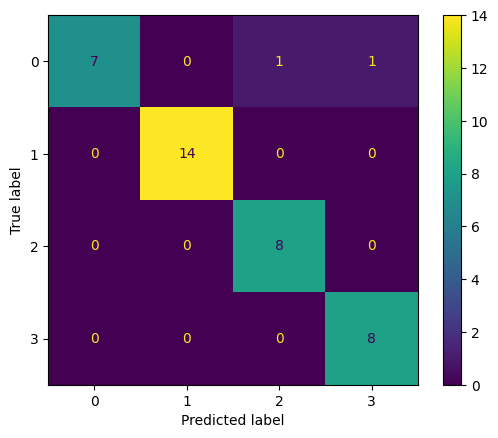

In [ ]:
conf_matrix = confusion_matrix(y1_test, y1_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

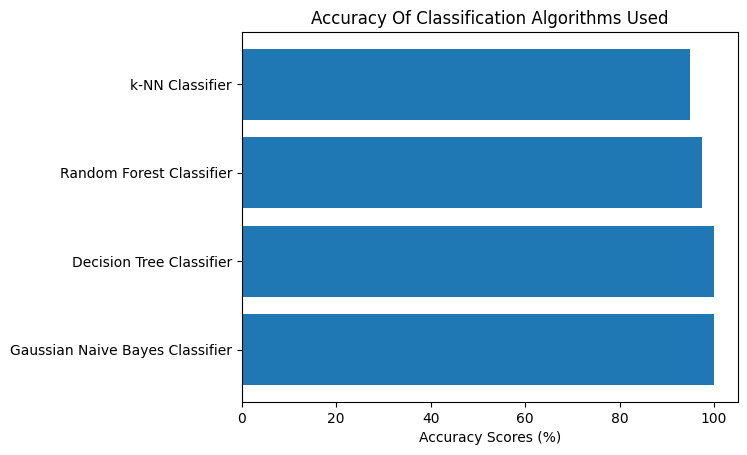

In [ ]:
algorithms = ['Gaussian Naive Bayes Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'k-NN Classifier']
model_scores = [accuracy_gnb, accuracy_dt , accuracy_rf , accuracy_knn ]

plt.barh(algorithms, model_scores)
plt.title('Accuracy Of Classification Algorithms Used')
plt.xlabel('Accuracy Scores (%)')
plt.show()

In [ ]:
import joblib
print(joblib.__version__)


1.3.2
